### Task Overview for Week 4 Project

- **Compare device usage** (smartphone, tablet, desktop, etc.) across demographics such as age, gender, and urban/rural regions.
- **Analyze activity categories** focusing on educational vs recreational usage within the same cohorts.
- **Identify peak usage patterns** and trends among different demographic groups.

### Visualization Requirements

- Create a minimum of **8 visualizations** to capture key insights.
- Suggested visual types:
  - Bar charts, stacked bar charts, and pie charts for device mix comparisons.
  - Heatmaps or grouped bar charts for activity categories across demographics.


### COHORT ANALYSIS

Cohort analysis is a method that groups data into cohorts—sets of people who share a common characteristic or experience—and compares their behaviors or outcomes over time.  
It helps reveal trends and differences between these groups that would be hidden in overall averages.



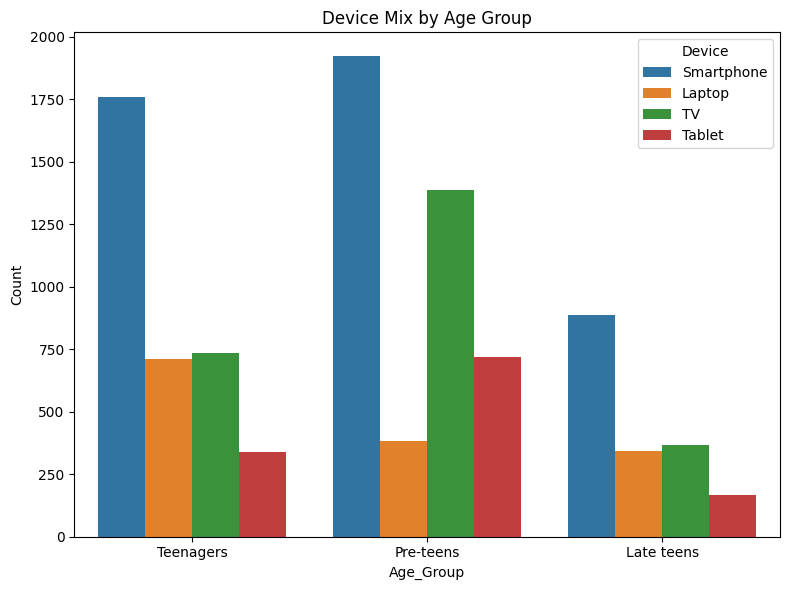

In [9]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/nishkarsh/Desktop/Infosys Internship/Week 2 /Updated_Dataset.csv')
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', hue='Primary_Device', data=df)
plt.title('Device Mix by Age Group')
plt.ylabel('Count')
plt.legend(title='Device')
plt.tight_layout()
plt.show()




### Device Mix by Age Group – Summary

- **Smartphones** are the most used device among all age groups, especially for pre-teens and teenagers.
- **Teenagers** and **pre-teens** both use laptops and TVs, but to a lesser extent than smartphones.
- **Tablet** usage is lowest across all groups.
- **Late teens** use smartphones less than younger groups and show a generally balanced use of devices.

*This indicates younger age groups heavily rely on smartphones, while other devices are less popular for screen time.*


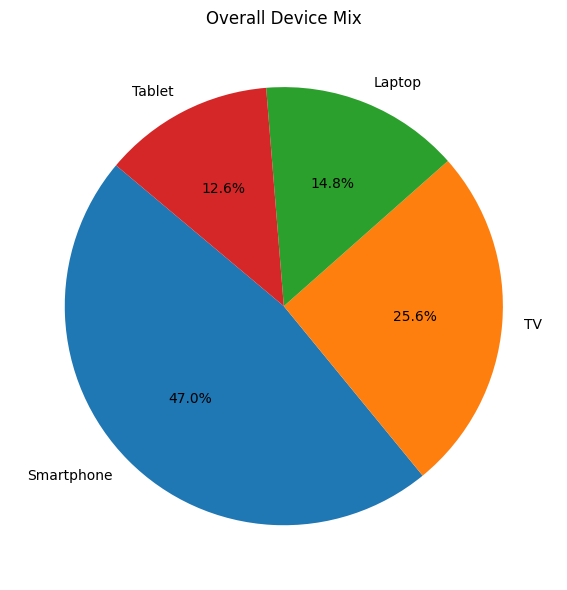

In [10]:
#2
device_counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Device Mix')
plt.tight_layout()
plt.show()


### Overall Device Mix – Summary

- **Smartphones** are the most common device, making up almost half of total device usage.
- **TVs** are the second most popular, with about a quarter share.
- **Laptops** and **tablets** have smaller shares, at around 15% and 13% respectively.
- The majority of screen time is spent on smartphones, with TVs, laptops, and tablets being used less often.

*This pie chart shows smartphones clearly dominate device preferences for screen activities.*


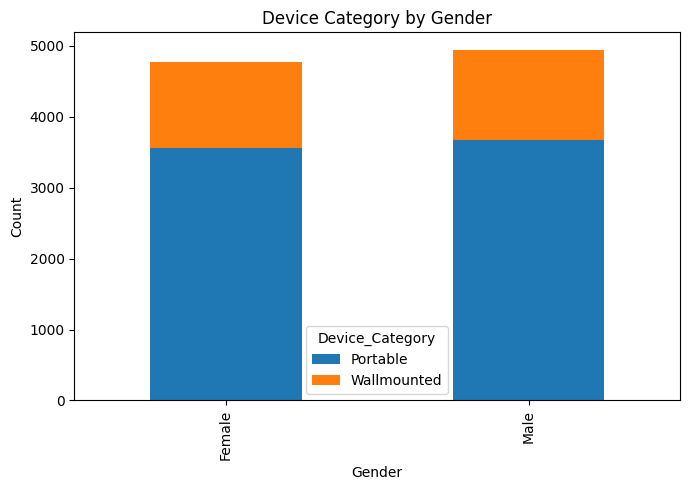

In [11]:
#3
device_cat_gender = pd.crosstab(df['Gender'], df['Device_Category'])
device_cat_gender.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Device Category by Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



### Device Category by Gender – Summary

- Both males and females show a strong preference for **portable devices** over wallmounted devices.
- The number of portable devices used is much higher than wallmounted devices for both genders.
- There is no major difference between males and females in their overall device category preference.

*This means portability is valued highly, regardless of gender, when it comes to device usage for screen time.*


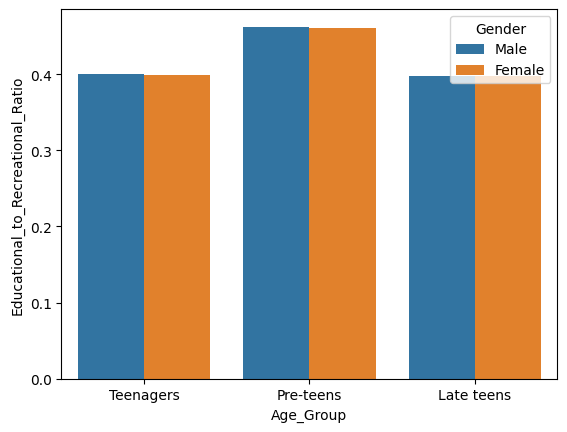

In [12]:
#4
sns.barplot(
    x='Age_Group',
    y='Educational_to_Recreational_Ratio',
    hue='Gender',
    data=df,
    errorbar=None
)
plt.show()

### Educational to Recreational Ratio by Age and Gender – Summary

- For all age groups, the educational to recreational screen time ratio is similar for boys and girls.
- **Pre-teens** have the highest ratio, meaning they spend a larger share of their screen time on educational activities.
- **Teenagers** and **late teens** have lower ratios, showing more time spent on recreational use.
- There is no big gender difference in any age group for this ratio.

*Younger kids (pre-teens) focus more on educational screen time than older age groups, for both genders.*


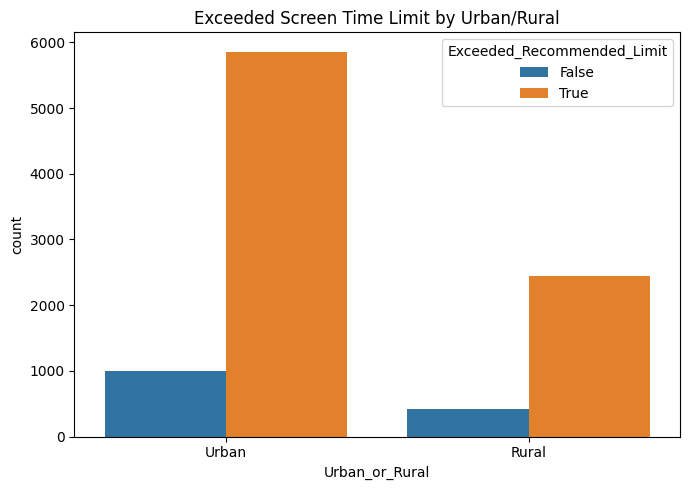

In [13]:
#5
plt.figure(figsize=(7,5))
sns.countplot(x='Urban_or_Rural', hue='Exceeded_Recommended_Limit', data=df)
plt.title('Exceeded Screen Time Limit by Urban/Rural')
plt.tight_layout()
plt.show()


### Exceeded Screen Time Limit by Urban/Rural – Summary

- A much higher number of kids in **urban areas** exceed the recommended screen time limit compared to rural areas.
- In both urban and rural settings, most kids go over the limit, but the issue is more pronounced in urban regions.
- Only a small proportion in either group stay within recommended limits.

*Urban children are more likely to exceed healthy screen time guidelines than rural children.*


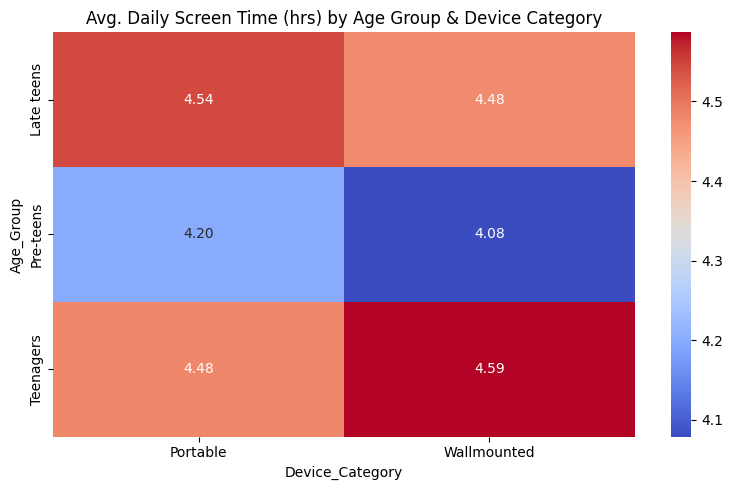

In [14]:
#6
heatmap_data = df.pivot_table('Avg_Daily_Screen_Time_hr', index='Age_Group', columns='Device_Category', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Avg. Daily Screen Time (hrs) by Age Group & Device Category')
plt.tight_layout()
plt.show()


### Avg. Daily Screen Time (hrs) by Age Group & Device Category – Summary

- **Teenagers** have the highest average daily screen time for both portable and wallmounted devices.
- **Late teens** also spend a lot of time on both device categories, just slightly less than teenagers.
- **Pre-teens** have the lowest average daily screen time, regardless of device type.
- The difference between device categories within each age group is small, but teenagers consistently lead in total hours.

*Screen time increases with age, peaking among teenagers on all types of devices.*


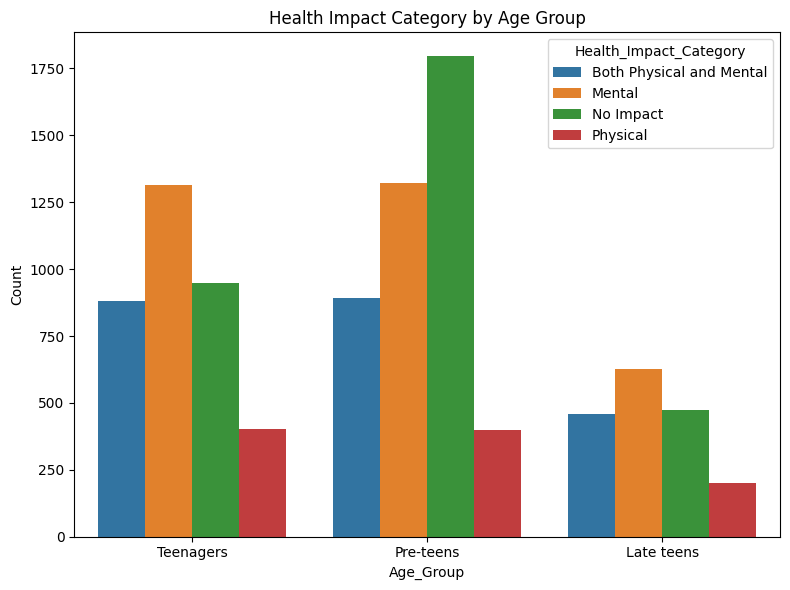

In [15]:
#7
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', hue='Health_Impact_Category', data=df)
plt.title('Health Impact Category by Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Health Impact Category by Age Group – Summary

- **Pre-teens** have the highest number of kids reporting "No Impact" from screen time, followed by "Mental" health impacts.
- **Teenagers** show more "Mental" and "Both Physical and Mental" impacts than other categories.
- **Late teens** report fewer impacts in all categories, but the numbers for "Physical" and "No Impact" are about the same.
- The type of health impact varies with age, but mental health concerns are significant for both pre-teens and teenagers.

*Mental and mixed health impacts are common for older kids, while many pre-teens report no health issues from screen time.*


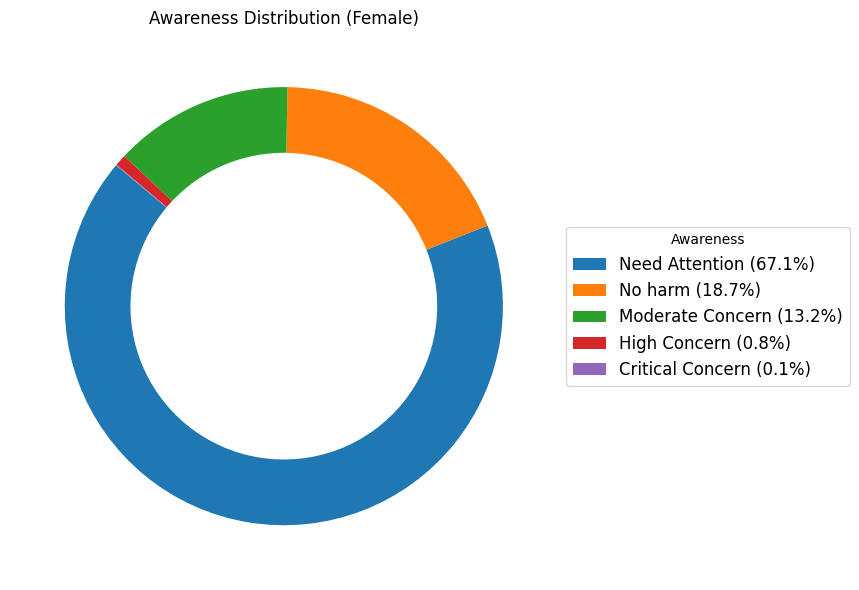

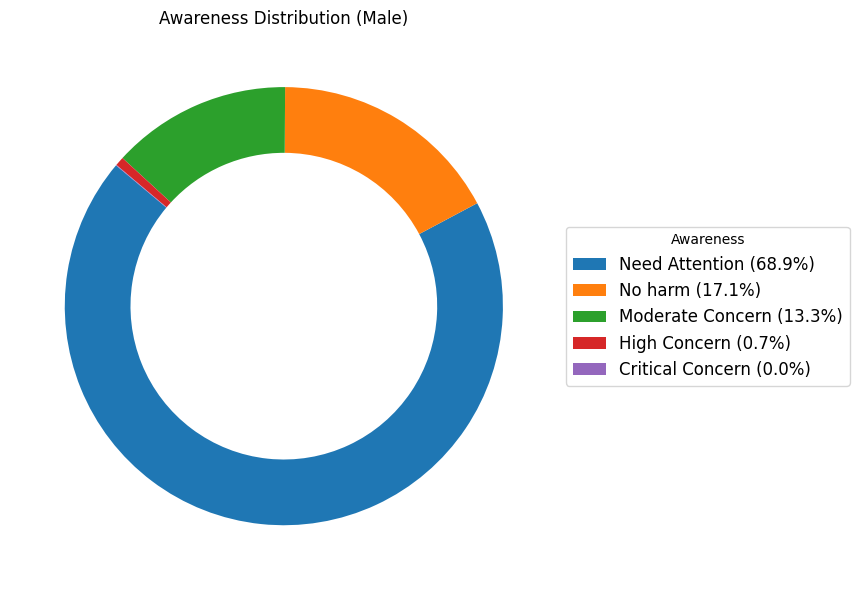

In [16]:
#8
import matplotlib.pyplot as plt

def plot_awareness_donut(gender):
    awareness_counts = df[df['Gender'] == gender]['awareness'].value_counts()
    total = awareness_counts.sum()
    labels = [
        f'{cat} ({val/total:.1%})' for cat, val in zip(awareness_counts.index, awareness_counts.values)
    ]
    plt.figure(figsize=(8,6))
    wedges, _ = plt.pie(  # Only unpack two variables
        awareness_counts,
        labels=None,
        startangle=140,
        wedgeprops=dict(width=0.3)
    )
    plt.legend(
        wedges,
        labels,
        title="Awareness",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=12
    )
    plt.title(f'Awareness Distribution ({gender})')
    plt.tight_layout()
    plt.show()

# Plot for Female
plot_awareness_donut('Female')

# Plot for Male
plot_awareness_donut('Male')




### Awareness Distribution (Male & Female) – Summary

- The largest segment for both boys and girls is **"Need Attention"** (about 67-69%), showing that most kids' screen habits need improvements or monitoring.
- **"No harm"** is the next most common category (about 17-19%), indicating a significant portion show no parents/experts' concern.
- Around 13% in both groups fall under **"Moderate Concern"**, needing some caution but not urgent help.
- **High Concern** and **Critical Concern** make up a very small proportion (less than 1%), for both males and females.

*Most kids need attention on their screen habits, and there is no major awareness difference between boys and girls.*


### HUE ANALYSIS

Hue analysis is a technique to compare data groups within a dataset based on a categorical variable called "hue".  
It helps to visualize differences or patterns across subgroups by coloring or grouping data points during plotting.  
Hue allows understanding how multiple categories behave relative to each other in the same chart, such as comparing screen time by gender or device type in a single plot.


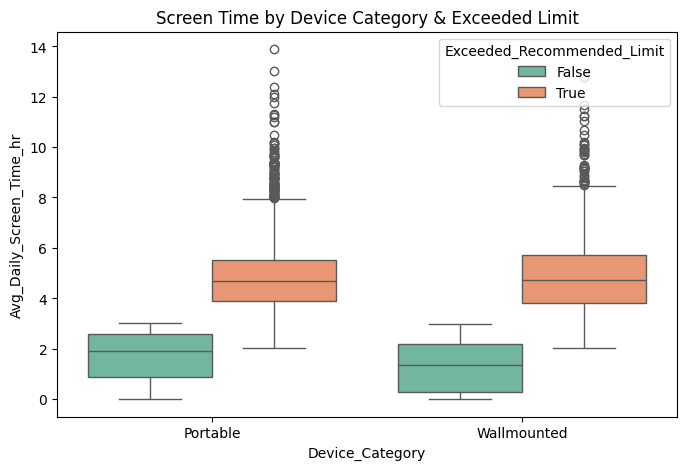

In [17]:
#1
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Device_Category',
    y='Avg_Daily_Screen_Time_hr',
    hue='Exceeded_Recommended_Limit',
    data=df, palette='Set2'
)
plt.title('Screen Time by Device Category & Exceeded Limit')
plt.show()


### Screen Time by Device Category & Exceeded Limit – Summary

- Kids who **exceed the recommended screen time limit** have much higher average daily screen time than those who stay within the limit, for both portable and wallmounted devices.
- The median and the range (spread) of screen time are both higher in the "Exceeded Limit" group for all device types.
- A few outliers with very high screen time exist, especially among those exceeding the limit.
- The difference in screen time between portable and wallmounted device users is small, but exceeding the limit makes a clear impact overall.

*Exceeding the recommended limit leads to much more screen exposure, regardless of whether devices are portable or wallmounted.*


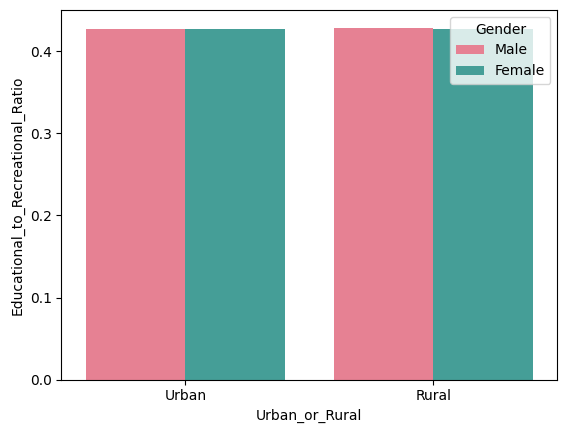

In [18]:
#2
sns.barplot(
    x='Urban_or_Rural',
    y='Educational_to_Recreational_Ratio',
    hue='Gender',
    data=df,
    errorbar=None,   
    palette='husl'
)
plt.show()


### Edu/Recreational Ratio by Region & Gender – Summary

- The educational to recreational ratio is almost the same for both boys and girls, in both urban and rural areas.
- There is no clear difference between urban and rural children, or between genders, in how they split their screen time between educational and recreational activities.

*Screen use habits for learning vs fun are similar for all groups, regardless of gender or living region.*


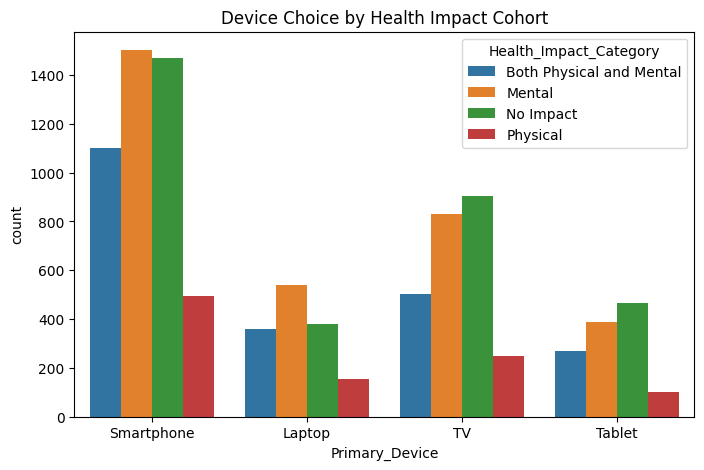

In [19]:
#3
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Primary_Device',
    hue='Health_Impact_Category',
    data=df, palette='tab10'
)
plt.title('Device Choice by Health Impact Cohort')
plt.show()


### Device Choice by Health Impact Cohort – Summary

- **Smartphone** is the most used device in all health impact categories, especially among those with no health impact or only mental impacts.
- For kids reporting "Both Physical and Mental" impacts, smartphone and TV use are both high, followed by laptops.
- **Tablet** is the least used device across all health impact groups.
- The distribution suggests children with mental health impacts or no reported issues prefer smartphones, while those with broader (mental and physical) impacts use a wider mix of devices.

*Smartphones are the top choice for all groups, but those with complex health impacts use more TVs and laptops too.*


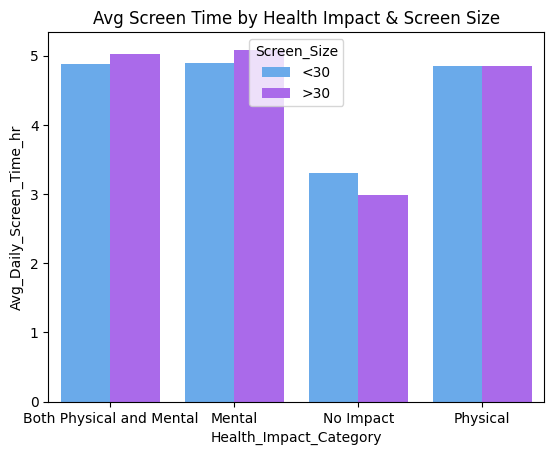

In [20]:
#4
sns.barplot(
    x='Health_Impact_Category',
    y='Avg_Daily_Screen_Time_hr',
    hue='Screen_Size',
    data=df,
    palette='cool',
    errorbar=None
)
plt.title('Avg Screen Time by Health Impact & Screen Size')
plt.show()

### Avg Screen Time by Health Impact & Screen Size – Summary

- Kids with **both physical and mental impacts** spend the most time on screens, for both small and large devices.
- Those with only **mental** or **physical** impacts also have high average screen time, especially with larger screens.
- Kids reporting **no impact** have the lowest average daily screen time.
- In every health impact group, children using devices with screens greater than 30 inches have slightly lower or similar average screen time compared to those using smaller screens.

*Greater health impact is linked to more screen use, and high usage happens across all screen sizes.*


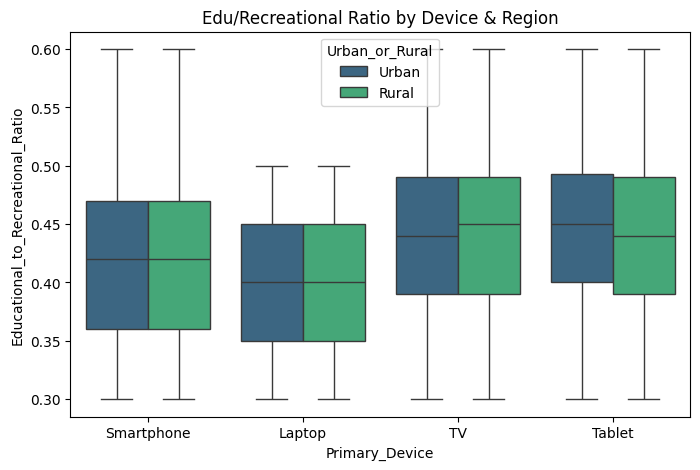

In [21]:
#5
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Primary_Device',
    y='Educational_to_Recreational_Ratio',
    hue='Urban_or_Rural',
    data=df, palette='viridis'
)
plt.title('Edu/Recreational Ratio by Device & Region')
plt.show()


### Edu/Recreational Ratio by Device & Region – Summary

- The ratio of educational to recreational screen time is quite similar across all device types (smartphone, laptop, TV, tablet).
- There is very little difference between **urban** and **rural** user ratios for any device group.
- The spread (variation) is also similar for urban and rural children, no matter which device is used.

*Regardless of region or device, kids' balance between educational and recreational screen use stays almost the same.*


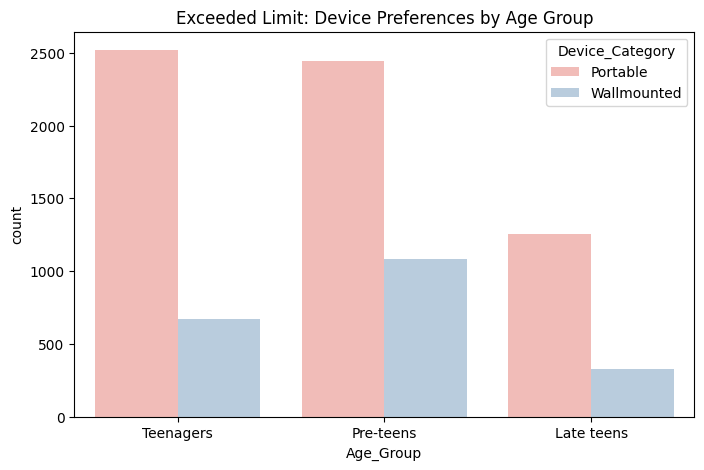

In [22]:
#6
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Age_Group',
    hue='Device_Category',
    data=df[df['Exceeded_Recommended_Limit']], palette='Pastel1'
)
plt.title('Exceeded Limit: Device Preferences by Age Group')
plt.show()


### Exceeded Limit: Device Preferences by Age Group – Summary

- In all age groups, most kids who exceed the recommended screen time limit prefer **portable devices** over wallmounted ones.
- **Teenagers** and **pre-teens** have the highest counts for portable device use among those exceeding the limit.
- Use of wallmounted devices is lower in every age group compared to portable devices, but pre-teens show slightly more usage of wallmounted devices than late teens.
- As age increases, portable device preference remains strong among high-use groups.

*Kids who go over healthy screen time limits overwhelmingly use portable devices, regardless of age group.*


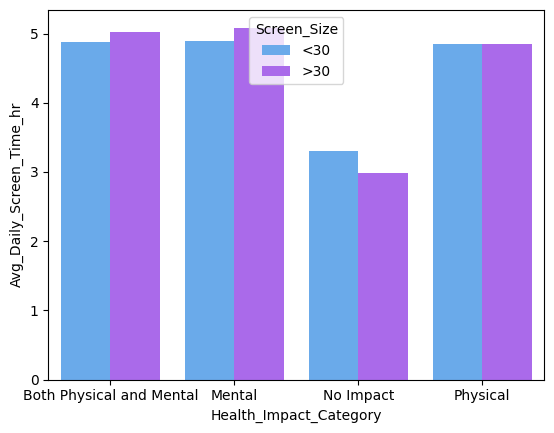

In [23]:
#7
sns.barplot(
    x='Health_Impact_Category',
    y='Avg_Daily_Screen_Time_hr',
    hue='Screen_Size',
    data=df, palette='cool', errorbar=None
)
plt.show()



### Avg Screen Time by Health Impact & Screen Size – Summary

- Children reporting **both physical and mental health impacts** from screen use have the highest average daily screen time, regardless of screen size.
- Those with only **mental** or **physical** health impacts also have high screen time, and for most impact types, larger screens (>30 inches) are associated with slightly lower or similar average hours.
- Kids with **no reported health impact** spend the least time on screens.
- The average daily screen time remains similar between small and large screens within each health impact group.

*More health impacts are linked to greater screen time, but whether the device has a small or large screen makes little difference.*


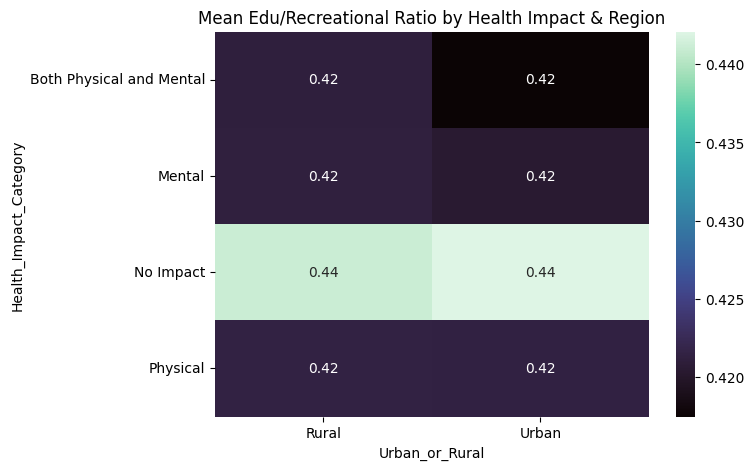

In [24]:
#8
pivot = df.pivot_table(
    values='Educational_to_Recreational_Ratio',
    index='Health_Impact_Category',
    columns='Urban_or_Rural',
    aggfunc='mean')
plt.figure(figsize=(7,5))
sns.heatmap(
    pivot, 
    annot=True, 
    fmt='.2f', 
    cmap='mako')
plt.title('Mean Edu/Recreational Ratio by Health Impact & Region')
plt.show()


### Mean Edu/Recreational Ratio by Health Impact & Region – Summary

- Kids reporting **no health impacts** have a higher mean ratio of educational to recreational screen use compared to those reporting any health impacts (physical, mental, or both).
- This pattern is consistent across both **urban and rural** groups.
- For every health impact type, the region (urban or rural) makes almost no difference—the ratios are almost identical everywhere.

*Children with no health issues linked to screens tend to use them for education more than those experiencing health impacts, and this trend is the same in both urban and rural areas.*


### Overall Summary of Week 4 Project

- Explored device usage patterns (smartphone, tablet, etc.) across different age, gender, and region (urban/rural) groups.
- Compared educational and recreational activity categories for the same cohorts.
- Created more than 8 visualizations using bar charts, pie charts, and heatmaps to show device mix and activity trends.
- Identified which demographics use which devices most and when peak educational or recreational usage occurs.
- Provided simple cohort and hue analysis explanations to clarify group comparisons in the visuals.
- Summarized key findings with markdown notes for project clarity and reporting.
